In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [3]:
# read the CSV file from system and assign variable name
df=pd.read_csv("Walmart.csv")

In [4]:
#Generate the first 5 row from the dataset
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Which store has maximum sales

In [5]:
#Get maximum value of all the columns
maxValuesObj = df.max()
print(maxValuesObj)

Store                    45
Date               9/9/2011
Weekly_Sales    3.81869e+06
Holiday_Flag              1
Temperature          100.14
Fuel_Price            4.468
CPI                 227.233
Unemployment         14.313
dtype: object


In [6]:
#Convert Weekly sales to Interger and Group the dataset by Store sum
df['Weekly_Sales'] = df['Weekly_Sales'].astype('int64')
max_store = df.groupby(['Store']).sum()

In [7]:
#sort by Weekly sales in descending order
df_group=max_store.sort_values('Weekly_Sales', ascending= False)
df_group

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
20,301397719,10,7929.55,488.718,29892.452680,1054.112
4,299543881,10,8902.23,460.027,18401.192733,852.951
14,288999841,10,8264.11,488.718,26638.851959,1236.771
13,286517633,10,7678.69,469.919,18401.192733,1001.261
2,275382373,10,9754.94,460.417,30837.422420,1090.210
10,271617645,10,10330.49,511.357,18401.192733,1195.904
27,253855845,10,8195.49,511.696,19878.613542,1144.250
6,223756059,10,9967.10,460.417,31110.107182,944.787
1,222402734,10,9767.87,460.417,30887.555523,1088.290


In [8]:
#Get maximum value from the dataframe
maxSales=max(df_group['Weekly_Sales'])
maxSales

301397719

### ANSWER 1 :Store 20 has the maximum sales of 301397719

# Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [9]:
#get the Standard Deviation of the dataset
np.std(df)

Store               12.987173
Weekly_Sales    564322.768257
Holiday_Flag         0.255029
Temperature         18.443500
Fuel_Price           0.458984
CPI                 39.353654
Unemployment         1.875739
dtype: float64

In [10]:
#Get the maximum Weekly Sales Standard Deviation
df_std=df.loc[df['Weekly_Sales'].idxmax()]
df_std

Store                   14
Date            24-12-2010
Weekly_Sales       3818686
Holiday_Flag             0
Temperature          30.59
Fuel_Price           3.141
CPI                182.545
Unemployment         8.724
Name: 1905, dtype: object

### Answer 2: Store 14 have the maximum standard deviation sales with 3818686

In [11]:
#Generate the Coeefficient of mean to Standard Deviation
mean=np.mean(df_group['Weekly_Sales'])
maxStd= np.std(df_group['Weekly_Sales'])
np.divide(maxStd,mean)

0.5162721180867229

#### coefficient of mean to standard deviation is 0.5162721180867229

# Which store/s has good quarterly growth rate in Q3’2012

In [12]:
#Create a variable consisting Date Store and Weekly Sales
Quart_Sales = df[["Date","Store", "Weekly_Sales"]]
Quart_Sales.head()

,Date,Store,Weekly_Sales
0,5/2/2010,1,1643690
1,12/2/2010,1,1641957
2,19-02-2010,1,1611968
3,26-02-2010,1,1409727
4,5/3/2010,1,1554806


In [13]:
#Get the type
Quart_Sales.dtypes

Date            object
Store            int64
Weekly_Sales     int64
dtype: object

In [14]:
#Convert Date column to Date and time
Quart_Sales['Date'] = pd.to_datetime(Quart_Sales["Date"])
Quart_Sales['Date']

C:\Users\cugagu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
6430   2012-09-28
6431   2012-05-10
6432   2012-12-10
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [15]:
#set Date as index for Quart_Sales
Quart_Sales=Quart_Sales.set_index('Date')
Quart_Sales.index

DatetimeIndex(['2010-05-02', '2010-12-02', '2010-02-19', '2010-02-26',
               '2010-05-03', '2010-12-03', '2010-03-19', '2010-03-26',
               '2010-02-04', '2010-09-04',
               ...
               '2012-08-24', '2012-08-31', '2012-07-09', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-05-10', '2012-12-10',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=6435, freq=None)

In [16]:
print(Quart_Sales)

            Store  Weekly_Sales
Date                           
2010-05-02      1       1643690
2010-12-02      1       1641957
2010-02-19      1       1611968
2010-02-26      1       1409727
2010-05-03      1       1554806
...           ...           ...
2012-09-28     45        713173
2012-05-10     45        733455
2012-12-10     45        734464
2012-10-19     45        718125
2012-10-26     45        760281

[6435 rows x 2 columns]


In [17]:
#Create Year 
Quart_Sales['Year'] = Quart_Sales.index.year
Quart_Sales

,Store,Weekly_Sales,Year
Date,,,
2010-05-02,1,1643690,2010
2010-12-02,1,1641957,2010
2010-02-19,1,1611968,2010
2010-02-26,1,1409727,2010
2010-05-03,1,1554806,2010
...,...,...,...
2012-09-28,45,713173,2012
2012-05-10,45,733455,2012
2012-12-10,45,734464,2012


In [18]:
#Get the  data with Year  2012
quart_2012=Quart_Sales.loc['2012']
quart_2012

,Store,Weekly_Sales,Year
Date,,,
2012-06-01,1,1550369,2012
2012-01-13,1,1459601,2012
2012-01-20,1,1394393,2012
2012-01-27,1,1319325,2012
2012-03-02,1,1636339,2012
...,...,...,...
2012-09-28,45,713173,2012
2012-05-10,45,733455,2012
2012-12-10,45,734464,2012


In [19]:
#index Store
quart_2012.set_index("Store")

,Weekly_Sales,Year
Store,,
1,1550369,2012
1,1459601,2012
1,1394393,2012
1,1319325,2012
1,1636339,2012
...,...,...
45,713173,2012
45,733455,2012
45,734464,2012


In [20]:
#Group by Sumed Store ,Drop Year 
max_quart = quart_2012.groupby(['Store']).sum()
quart_drop= max_quart.drop(['Year'], axis=1)
max_third=quart_drop.sort_values('Weekly_Sales', ascending= False)
max_third.head()

,Weekly_Sales
Store,
4,92771166
20,89827688
13,86707435
2,81496678
10,78228596


### Answer 3: Stores 4,20,13,2 and 10 have good quarterly growth rate in Q3' 2012

# Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [21]:
#Convert Date to datatime
df['Date']= pd.to_datetime(df['Date']) 

In [22]:
#Generate the name of Months
months = []
months
for i in range (df.shape[0]): 
    months.append (df['Date'][i].month)
Month_names = df['Date'].dt.month_name()
Month_names


0             May
1        December
2        February
3        February
4             May
          ...    
6430    September
6431          May
6432     December
6433      October
6434      October
Name: Date, Length: 6435, dtype: object

In [23]:
#Add Month Name to the dataset
df['Month_name'] = Month_names
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month_name
0,1,2010-05-02,1643690,0,42.31,2.572,211.096358,8.106,May
1,1,2010-12-02,1641957,1,38.51,2.548,211.242170,8.106,December
2,1,2010-02-19,1611968,0,39.93,2.514,211.289143,8.106,February
3,1,2010-02-26,1409727,0,46.63,2.561,211.319643,8.106,February
4,1,2010-05-03,1554806,0,46.50,2.625,211.350143,8.106,May
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173,0,64.88,3.997,192.013558,8.684,September
6431,45,2012-05-10,733455,0,64.89,3.985,192.170412,8.667,May
6432,45,2012-12-10,734464,0,54.47,4.000,192.327265,8.667,December
6433,45,2012-10-19,718125,0,56.47,3.969,192.330854,8.667,October


In [24]:
# Generate Month by Number and add to dataset as Exact Month
df['Date'][0].month
df['Exact_month'] = months
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month_name,Exact_month
0,1,2010-05-02,1643690,0,42.31,2.572,211.096358,8.106,May,5
1,1,2010-12-02,1641957,1,38.51,2.548,211.242170,8.106,December,12
2,1,2010-02-19,1611968,0,39.93,2.514,211.289143,8.106,February,2
3,1,2010-02-26,1409727,0,46.63,2.561,211.319643,8.106,February,2
4,1,2010-05-03,1554806,0,46.50,2.625,211.350143,8.106,May,5
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173,0,64.88,3.997,192.013558,8.684,September,9
6431,45,2012-05-10,733455,0,64.89,3.985,192.170412,8.667,May,5
6432,45,2012-12-10,734464,0,54.47,4.000,192.327265,8.667,December,12
6433,45,2012-10-19,718125,0,56.47,3.969,192.330854,8.667,October,10


In [25]:
#Get the value count of Holiday Flag
df['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [26]:
# Create a variable for Holiday flag with 1 
Holiday = df[df['Holiday_Flag'] == 1]
Holiday

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month_name,Exact_month
1,1,2010-12-02,1641957,1,38.51,2.548,211.242170,8.106,December,12
31,1,2010-10-09,1507460,1,78.69,2.565,211.495190,7.787,October,10
42,1,2010-11-26,1955624,1,64.52,2.735,211.748433,7.838,November,11
47,1,2010-12-31,1367320,1,48.43,2.943,211.404932,7.838,December,12
53,1,2011-11-02,1649614,1,36.39,3.022,212.936705,7.742,November,11
...,...,...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129,1,71.48,3.738,186.673738,8.625,September,9
6386,45,2011-11-25,1170672,1,48.71,3.492,188.350400,8.523,November,11
6391,45,2011-12-30,869403,1,37.79,3.389,189.062016,8.523,December,12
6397,45,2012-10-02,803657,1,37.00,3.640,189.707605,8.424,October,10


In [27]:
# Create a variable for Holiday flag with 0
Not_holiday = df[df['Holiday_Flag'] == 0]
Not_holiday

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month_name,Exact_month
0,1,2010-05-02,1643690,0,42.31,2.572,211.096358,8.106,May,5
2,1,2010-02-19,1611968,0,39.93,2.514,211.289143,8.106,February,2
3,1,2010-02-26,1409727,0,46.63,2.561,211.319643,8.106,February,2
4,1,2010-05-03,1554806,0,46.50,2.625,211.350143,8.106,May,5
5,1,2010-12-03,1439541,0,57.79,2.667,211.380643,8.106,December,12
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173,0,64.88,3.997,192.013558,8.684,September,9
6431,45,2012-05-10,733455,0,64.89,3.985,192.170412,8.667,May,5
6432,45,2012-12-10,734464,0,54.47,4.000,192.327265,8.667,December,12
6433,45,2012-10-19,718125,0,56.47,3.969,192.330854,8.667,October,10


In [28]:
# Create a variable for Holiday flag with 1 
Holiday_period = df[df['Holiday_Flag'] == 1]
Holiday_period

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month_name,Exact_month
1,1,2010-12-02,1641957,1,38.51,2.548,211.242170,8.106,December,12
31,1,2010-10-09,1507460,1,78.69,2.565,211.495190,7.787,October,10
42,1,2010-11-26,1955624,1,64.52,2.735,211.748433,7.838,November,11
47,1,2010-12-31,1367320,1,48.43,2.943,211.404932,7.838,December,12
53,1,2011-11-02,1649614,1,36.39,3.022,212.936705,7.742,November,11
...,...,...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129,1,71.48,3.738,186.673738,8.625,September,9
6386,45,2011-11-25,1170672,1,48.71,3.492,188.350400,8.523,November,11
6391,45,2011-12-30,869403,1,37.79,3.389,189.062016,8.523,December,12
6397,45,2012-10-02,803657,1,37.00,3.640,189.707605,8.424,October,10


In [29]:
# Create a variable for Holiday flag with 0
Non_holiday = df[df['Holiday_Flag'] == 0]
Non_holiday

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month_name,Exact_month
0,1,2010-05-02,1643690,0,42.31,2.572,211.096358,8.106,May,5
2,1,2010-02-19,1611968,0,39.93,2.514,211.289143,8.106,February,2
3,1,2010-02-26,1409727,0,46.63,2.561,211.319643,8.106,February,2
4,1,2010-05-03,1554806,0,46.50,2.625,211.350143,8.106,May,5
5,1,2010-12-03,1439541,0,57.79,2.667,211.380643,8.106,December,12
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173,0,64.88,3.997,192.013558,8.684,September,9
6431,45,2012-05-10,733455,0,64.89,3.985,192.170412,8.667,May,5
6432,45,2012-12-10,734464,0,54.47,4.000,192.327265,8.667,December,12
6433,45,2012-10-19,718125,0,56.47,3.969,192.330854,8.667,October,10


In [30]:
# Create a variable for grouped Holiday by Month and weeklySales
Hol_by_month = Holiday_period.groupby('Month_name')['Weekly_Sales'].mean()
Hol_by_month

Month_name
December     9.986044e+05
July         1.074001e+06
November     1.331487e+06
October      1.062708e+06
September    1.039182e+06
Name: Weekly_Sales, dtype: float64

In [31]:
# Create a variable for grouped Non Holiday by WeeklySales
Non_hol_by_month = Not_holiday['Weekly_Sales'].mean()
Non_hol_by_month

1041255.8887218045

In [32]:
#Create a Bolean expression comparing Holiday and non Holiday
Hol_by_month > Non_hol_by_month

Month_name
December     False
July          True
November      True
October       True
September    False
Name: Weekly_Sales, dtype: bool

In [33]:
#Holiday with Higher Sales
Hol_with_higher_sales = np.round(Hol_by_month[(Hol_by_month) > (Non_hol_by_month)], 0)
Hol_with_higher_sales

Month_name
July        1074001.0
November    1331487.0
October     1062708.0
Name: Weekly_Sales, dtype: float64

In [34]:
#Convert to dataframe 
Hol_with_higher_sales = pd.DataFrame(Hol_with_higher_sales)
Hol_with_higher_sales.reset_index()

,Month_name,Weekly_Sales
0,July,1074001.0
1,November,1331487.0
2,October,1062708.0


### Answer 4 : February (Super Bowl), September (Labour Day) and November (Thanksgiving Day) all have sales that is higher than the mean of all sales in non-holiday season for all stores together

# Provide a monthly and semester view of sales in units and give insights

In [35]:
#Convert to datetime
pd.to_datetime(df["Date"])

0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
6430   2012-09-28
6431   2012-05-10
6432   2012-12-10
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [36]:
#View the dataset
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month_name,Exact_month
0,1,2010-05-02,1643690,0,42.31,2.572,211.096358,8.106,May,5
1,1,2010-12-02,1641957,1,38.51,2.548,211.242170,8.106,December,12
2,1,2010-02-19,1611968,0,39.93,2.514,211.289143,8.106,February,2
3,1,2010-02-26,1409727,0,46.63,2.561,211.319643,8.106,February,2
4,1,2010-05-03,1554806,0,46.50,2.625,211.350143,8.106,May,5
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173,0,64.88,3.997,192.013558,8.684,September,9
6431,45,2012-05-10,733455,0,64.89,3.985,192.170412,8.667,May,5
6432,45,2012-12-10,734464,0,54.47,4.000,192.327265,8.667,December,12
6433,45,2012-10-19,718125,0,56.47,3.969,192.330854,8.667,October,10


In [37]:
#Create a Variable with Exact Month Month Name and Weekly Sales
Monthly_sales = df[['Exact_month','Month_name','Weekly_Sales']]
Monthly_sales

,Exact_month,Month_name,Weekly_Sales
0,5,May,1643690
1,12,December,1641957
2,2,February,1611968
3,2,February,1409727
4,5,May,1554806
...,...,...,...
6430,9,September,713173
6431,5,May,733455
6432,12,December,734464
6433,10,October,718125


In [38]:
#Get Exact Month
Monthly_sales['Exact_month']

0        5
1       12
2        2
3        2
4        5
        ..
6430     9
6431     5
6432    12
6433    10
6434    10
Name: Exact_month, Length: 6435, dtype: int64

In [39]:
# Round up and sum up Exact Month and Month Name by Weekly Sales
Monthly_sales = np.round(Monthly_sales.groupby(['Exact_month','Month_name'])['Weekly_Sales'].sum(),0)
Monthly_sales

Exact_month  Month_name
1            January       426426052
2            February      522025442
3            March         553486149
4            April         645323579
5            May           605696302
6            June          575017693
7            July          593313647
8            August        564231431
9            September     590531965
10           October       602918574
11           November      459169138
12           December      599075852
Name: Weekly_Sales, dtype: int64

In [40]:
#Convert to dataframe
Monthly_sales = pd.DataFrame(Monthly_sales)
Monthly_sales

,,Weekly_Sales
Exact_month,Month_name,
1,January,426426052
2,February,522025442
3,March,553486149
4,April,645323579
5,May,605696302
6,June,575017693
7,July,593313647
8,August,564231431
9,September,590531965


In [41]:
Monthly_sales.reset_index(inplace=True)
Monthly_sales

,Exact_month,Month_name,Weekly_Sales
0,1,January,426426052
1,2,February,522025442
2,3,March,553486149
3,4,April,645323579
4,5,May,605696302
5,6,June,575017693
6,7,July,593313647
7,8,August,564231431
8,9,September,590531965
9,10,October,602918574


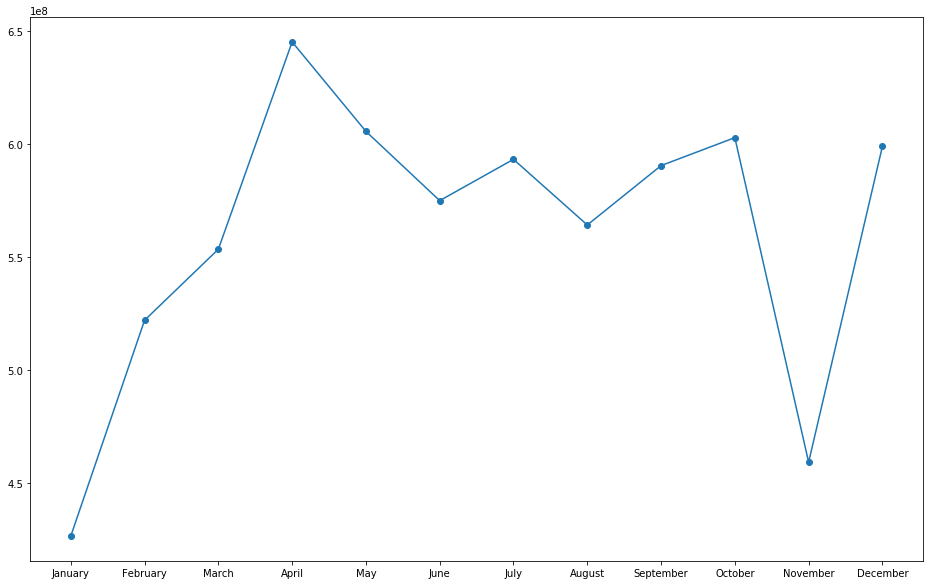

In [42]:
 #Create a plot a graph of Weekly sales and Monthly Name  from Monthly Sales variable
plt.figure(figsize=[16,10])
plt.plot('Month_name','Weekly_Sales', data = Monthly_sales, marker='o')


### Answer: According to the graph above there was greatest increase in sell was from January to february followed by November to December¶

# STATISTICAL ANALYSIS

## Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.


In [43]:
#Create a Variable by selecting only data with STORE 1 
stat= df[df['Store'] == 1]
stat

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month_name,Exact_month
0,1,2010-05-02,1643690,0,42.31,2.572,211.096358,8.106,May,5
1,1,2010-12-02,1641957,1,38.51,2.548,211.242170,8.106,December,12
2,1,2010-02-19,1611968,0,39.93,2.514,211.289143,8.106,February,2
3,1,2010-02-26,1409727,0,46.63,2.561,211.319643,8.106,February,2
4,1,2010-05-03,1554806,0,46.50,2.625,211.350143,8.106,May,5
...,...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059,0,76.08,3.666,222.981658,6.908,September,9
139,1,2012-05-10,1670785,0,68.55,3.617,223.181477,6.573,May,5
140,1,2012-12-10,1573072,0,62.99,3.601,223.381296,6.573,December,12
141,1,2012-10-19,1508068,0,67.97,3.594,223.425723,6.573,October,10


In [44]:
#Create a variable from the eariler data set of Store and Date
Stad = stat[['Store','Date']]
pd.DataFrame(Stad)

,Store,Date
0,1,2010-05-02
1,1,2010-12-02
2,1,2010-02-19
3,1,2010-02-26
4,1,2010-05-03
...,...,...
138,1,2012-09-28
139,1,2012-05-10
140,1,2012-12-10
141,1,2012-10-19


In [45]:
#Assign Numbers to the Date 
date_obj = stat[['Date']]
date_obj.index +=1
Stad.Date = date_obj.index
Stad

C:\Users\cugagu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Store,Date
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
138,1,139
139,1,140
140,1,141
141,1,142


### Linear Regression Answer 1 

In [46]:
#Generate the original dataset
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month_name,Exact_month
0,1,2010-05-02,1643690,0,42.31,2.572,211.096358,8.106,May,5
1,1,2010-12-02,1641957,1,38.51,2.548,211.242170,8.106,December,12
2,1,2010-02-19,1611968,0,39.93,2.514,211.289143,8.106,February,2
3,1,2010-02-26,1409727,0,46.63,2.561,211.319643,8.106,February,2
4,1,2010-05-03,1554806,0,46.50,2.625,211.350143,8.106,May,5
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173,0,64.88,3.997,192.013558,8.684,September,9
6431,45,2012-05-10,733455,0,64.89,3.985,192.170412,8.667,May,5
6432,45,2012-12-10,734464,0,54.47,4.000,192.327265,8.667,December,12
6433,45,2012-10-19,718125,0,56.47,3.969,192.330854,8.667,October,10


In [47]:
#Create a variable with Fuel price ,CPI ,Unemployment ,Weekly Sales  from the Variable with only store 1
dat = stat[['Fuel_Price','CPI','Unemployment','Weekly_Sales',]]
dat

,Fuel_Price,CPI,Unemployment,Weekly_Sales
0,2.572,211.096358,8.106,1643690
1,2.548,211.242170,8.106,1641957
2,2.514,211.289143,8.106,1611968
3,2.561,211.319643,8.106,1409727
4,2.625,211.350143,8.106,1554806
...,...,...,...,...
138,3.666,222.981658,6.908,1437059
139,3.617,223.181477,6.573,1670785
140,3.601,223.381296,6.573,1573072
141,3.594,223.425723,6.573,1508068


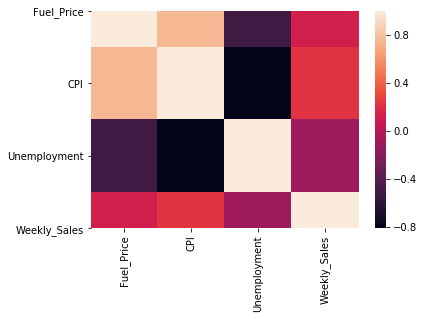

In [48]:
#Heatmap of the variable
sns.heatmap(dat.corr())

In [49]:
#Create Dependent variable (y) and independent variable (x)
x=dat.drop('Weekly_Sales',axis=1)
y=dat['Weekly_Sales']

In [50]:
#Create a test and train from dependent and independed variable
x_train, x_test, y_train, y_test = train_test_split(x ,y,test_size = 0.2 ,random_state =1 )

In [51]:
#Create a linear Regression and fit x train and x test
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
#append values to the array 
x = np.append (arr=np.ones((143 , 1)) .astype(int), values=x,axis=1)

In [54]:
#backward elimination method
#Create the array according the number of column on data set and get the OLS and fit the generate summary 
x_opt = np.array(x[:, [0, 1, 2, 3]], dtype=float)
model_ols =sm.OLS(endog = y ,exog = x_opt).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     4.303
Date:                Mon, 29 Jun 2020   Prob (F-statistic):            0.00616
Time:                        10:01:09   Log-Likelihood:                -1906.0
No. Observations:                 143   AIC:                             3820.
Df Residuals:                     139   BIC:                             3832.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.887e+06   1.74e+06     -2.234      0.027   -7.33e+06   -4.46e+05
x1         -6.484e+04   4.68e+04     -1.384      0.169   -1.57e+05    2.78e+04
x2          2.179e+04   6785.272      3.212      0.002    8375.997    3.52e+04
x3          1.241e+05   5.88e+04      2.111      0.037    7846.314     2.4e+05
==============================================================================
Omnibus:                       93.038   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              655.591
Skew:                           2.267   Prob(JB):                    4.37e-143
Kurtosis:                      12.459   Cond. No.                     2.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#If P values is greater than significant Level which is 0.05 the eliminate the array till you get the a P value less than 0.05

In [151]:
#Second Elimination
x_opt = np.array(x[:, [0, 2,3]], dtype=float)
model_ols =sm.OLS(endog = y ,exog = x_opt).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     5.461
Date:                Sun, 28 Jun 2020   Prob (F-statistic):            0.00520
Time:                        19:03:15   Log-Likelihood:                -1907.0
No. Observations:                 143   AIC:                             3820.
Df Residuals:                     140   BIC:                             3829.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.562e+06   1.46e+06     -1.757      0.081   -5.44e+06    3.21e+05
x1          1.544e+04   5017.492      3.078      0.003    5524.333    2.54e+04
x2          1.026e+05   5.69e+04      1.804      0.073   -9843.409    2.15e+05
==============================================================================
Omnibus:                       95.127   Durbin-Watson:                   1.522
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              675.235
Skew:                           2.333   Prob(JB):                    2.37e-147
Kurtosis:                      12.568   Cond. No.                     2.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [152]:
#Third Elimination
x_opt = np.array(x[:, [2,3]], dtype=float)
model_ols =sm.OLS(endog = y ,exog = x_opt).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Weekly_Sales   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              7449.
Date:                Sun, 28 Jun 2020   Prob (F-statistic):                   1.06e-143
Time:                        19:03:15   Log-Likelihood:                         -1908.5
No. Observations:                 143   AIC:                                      3821.
Df Residuals:                     141   BIC:                                      3827.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          6760.8828    874.077      7.735      0.000    5032.892    8488.873
x2           1.25e+04   2.48e+04      0.504      0.615   -3.65e+04    6.15e+04
==============================================================================
Omnibus:                       95.640   Durbin-Watson:                   1.472
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              648.694
Skew:                           2.375   Prob(JB):                    1.37e-141
Kurtosis:                      12.291   Cond. No.                         421.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
#Last elimination
x_opt = np.array(x[:, [2]], dtype=float)
model_ols =sm.OLS(endog = y ,exog = x_opt).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Weekly_Sales   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.498e+04
Date:                Sun, 28 Jun 2020   Prob (F-statistic):                   7.87e-146
Time:                        19:03:16   Log-Likelihood:                         -1908.6
No. Observations:                 143   AIC:                                      3819.
Df Residuals:                     142   BIC:                                      3822.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          7200.7540     58.841    122.376      0.000    7084.436    7317.072
==============================================================================
Omnibus:                       96.801   Durbin-Watson:                   1.467
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              671.494
Skew:                           2.402   Prob(JB):                    1.54e-146
Kurtosis:                      12.467   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
#Get the first 5 values of the final array whose p values is less than 0.05
x_opt[: 5]

array([[211.0963582],
       [211.2421698],
       [211.2891429],
       [211.3196429],
       [211.3501429]])

In [155]:
#Get the First 5 dataset of the DAT data frame and match with  x_opt array
dat.head()

,Fuel_Price,CPI,Unemployment,Weekly_Sales
0,2.572,211.096358,8.106,1643690
1,2.548,211.242170,8.106,1641957
2,2.514,211.289143,8.106,1611968
3,2.561,211.319643,8.106,1409727
4,2.625,211.350143,8.106,1554806


### Linear Regression Answer 2: CPI has impact on Weekly Sales

# Change dates into days by creating new variable.

In [156]:
#Creat a DAY column and generate day name 
df['Day'] = pd.to_datetime(df['Date']).dt.day_name()
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month_name,Exact_month,Day
0,1,2010-05-02,1643690,0,42.31,2.572,211.096358,8.106,May,5,Sunday
1,1,2010-12-02,1641957,1,38.51,2.548,211.242170,8.106,December,12,Thursday
2,1,2010-02-19,1611968,0,39.93,2.514,211.289143,8.106,February,2,Friday
3,1,2010-02-26,1409727,0,46.63,2.561,211.319643,8.106,February,2,Friday
4,1,2010-05-03,1554806,0,46.50,2.625,211.350143,8.106,May,5,Monday
